# Give Me Some Credit

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
%matplotlib inline

In [5]:
random_state = 1

# Charger les données

In [6]:
data = pd.read_csv('data/cs-training.csv').drop('Unnamed: 0', axis = 1)
data.loc[data.MonthlyIncome.isnull(), 'MonthlyIncome'] = data.MonthlyIncome.median()
data.loc[data.NumberOfDependents.isnull(), 'NumberOfDependents'] = data.NumberOfDependents.median()

In [7]:
X = data.drop('SeriousDlqin2yrs', axis=1)
y = data.SeriousDlqin2yrs

On fait un premier nettoyage des données qui consiste à remplacer les blancs par des médianes.

In [20]:
feature_names = np.array(X.columns)
X.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,6.048438,52.295207,0.421033,353.005076,6.418455e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,249.755371,14.771866,4.192781,2037.818523,1.289040e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


# Essai de plusieurs modèles simples

In [7]:
from sklearn.metrics import roc_curve, auc

In [8]:
clfs = {
    'RandomForestClassifier': RandomForestClassifier(n_estimators=10, random_state=random_state),
    'LogisticRegression': LogisticRegression(solver='lbfgs', random_state=random_state),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=random_state),
    'ExtraTreesClassifier': ExtraTreesClassifier(random_state=random_state),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'MLPClassifier': MLPClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(3),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=5),
    'GaussianNB': GaussianNB()
}

In [9]:
def fit_and_score_clfs(clfs, X=X, y=y, test_size=0.9):
    '''
        Given a dict of classifiers, return a dict of scores obtained by fitting each classifier
        on the set (X, y) with the given test_proportion

        clfs: dict of classifiers
                key: name of clf
                value: clf object
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    scores = dict()
    for name, clf in clfs.items():
        clf.fit(X_train, y_train)
        scores[name] = clf.score(X_test, y_test)

    return scores

In [10]:
fit_and_score_clfs(clfs)

/Users/antoine/Documents/Ponts/2A/MALAP/RAPPEL/GiveMeSomeCredit/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/antoine/Documents/Ponts/2A/MALAP/RAPPEL/GiveMeSomeCredit/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'RandomForestClassifier': 0.933274074074074,
 'LogisticRegression': 0.9331925925925926,
 'GradientBoostingClassifier': 0.9358444444444445,
 'ExtraTreesClassifier': 0.9307555555555556,
 'AdaBoostClassifier': 0.9357185185185185,
 'MLPClassifier': 0.9330296296296297,
 'KNeighborsClassifier': 0.9246074074074074,
 'DecisionTreeClassifier': 0.9351851851851852,
 'GaussianNB': 0.9326814814814814}

In [11]:
def eval_model(mod, X, y, name=None, CVNFOLDS=7):
    cv = StratifiedKFold(n_splits=CVNFOLDS)
    mem = []
    for i, (training, test) in enumerate(cv.split(X, y)):
        fit = mod.fit(X.iloc[training], y.iloc[training])
        prob = fit.predict_proba(X.iloc[test])
        fpr, tpr, _ = roc_curve(y.iloc[test], prob[:, 1])
        a = auc(fpr, tpr)
        mem.append(a)
        #print('ROC: %f' % a)
        plt.plot(fpr, tpr)
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.title(name)
    plt.show()
    print("Mean: %f" % np.mean(mem))

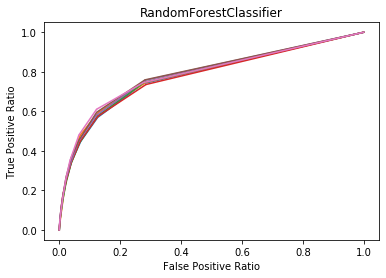

Mean: 0.782206


/Users/antoine/Documents/Ponts/2A/MALAP/RAPPEL/GiveMeSomeCredit/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/antoine/Documents/Ponts/2A/MALAP/RAPPEL/GiveMeSomeCredit/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/antoine/Documents/Ponts/2A/MALAP/RAPPEL/GiveMeSomeCredit/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/antoine/Documents/Ponts/2A/MALAP/RAPPEL/GiveMeSomeCredit/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations

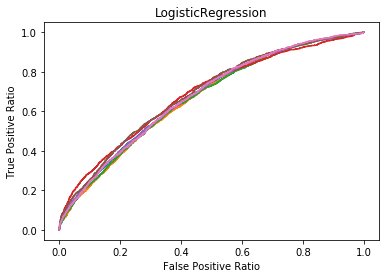

Mean: 0.674192


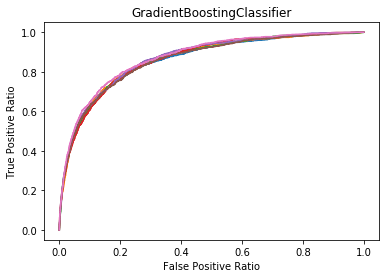

Mean: 0.864376


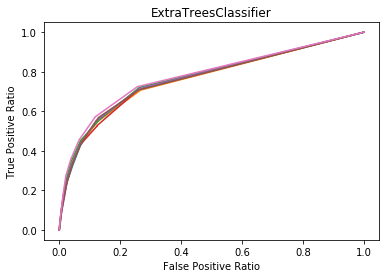

Mean: 0.766276


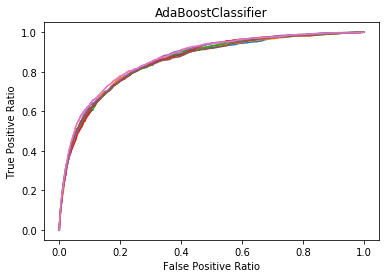

Mean: 0.858934


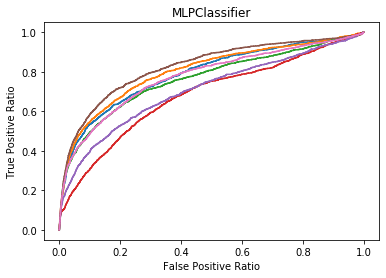

Mean: 0.762628


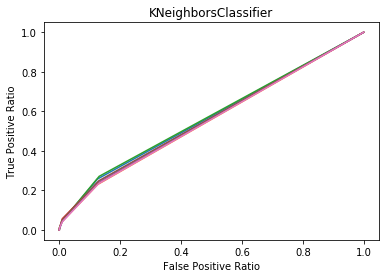

Mean: 0.560895


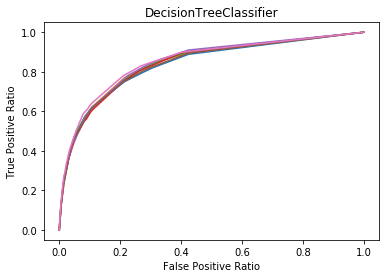

Mean: 0.843615


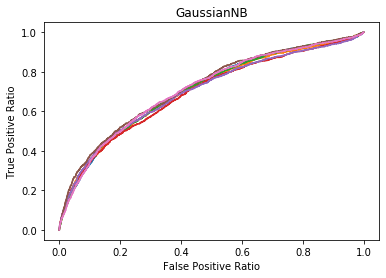

Mean: 0.705704


In [12]:
for name, clf in clfs.items():
    eval_model(clf, X, y, name=name)


# Visualisation des données

In [13]:
def visualization():
    # # B/M plot
    plt.barh(['no problem', 'seriousProblemIn2Years'], [np.sum(y == 1), np.sum(y == 0)])
    plt.xlabel('Nombre d\'entrées')
    plt.show()

    # Violin plot
    data_melt = data.melt(id_vars=['SeriousDlqin2yrs'])
    sns.violinplot(x='variable', y='value', hue='SeriousDlqin2yrs',
               split=True, inner="quart",
               scale='area',
               data=data_melt)
    sns.despine(left=True)
    plt.xticks(rotation=90)
    plt.xlabel('')
    plt.show()

    # Correlation
    # Compute the correlation matrix
    corr = X.corr()

    # # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # # Draw the heatmap with the mask and correct aspect ratio
    f, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", linewidths=.7)
    plt.show()

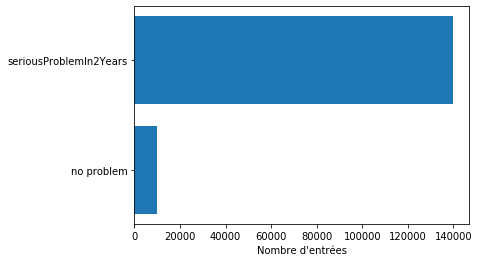

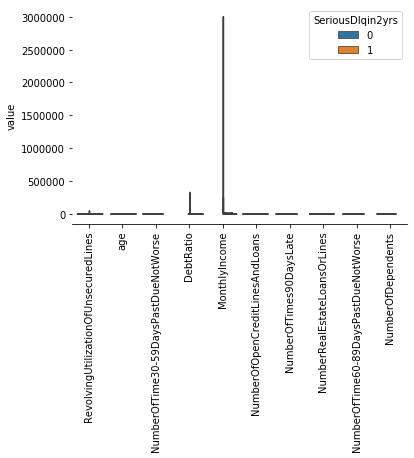

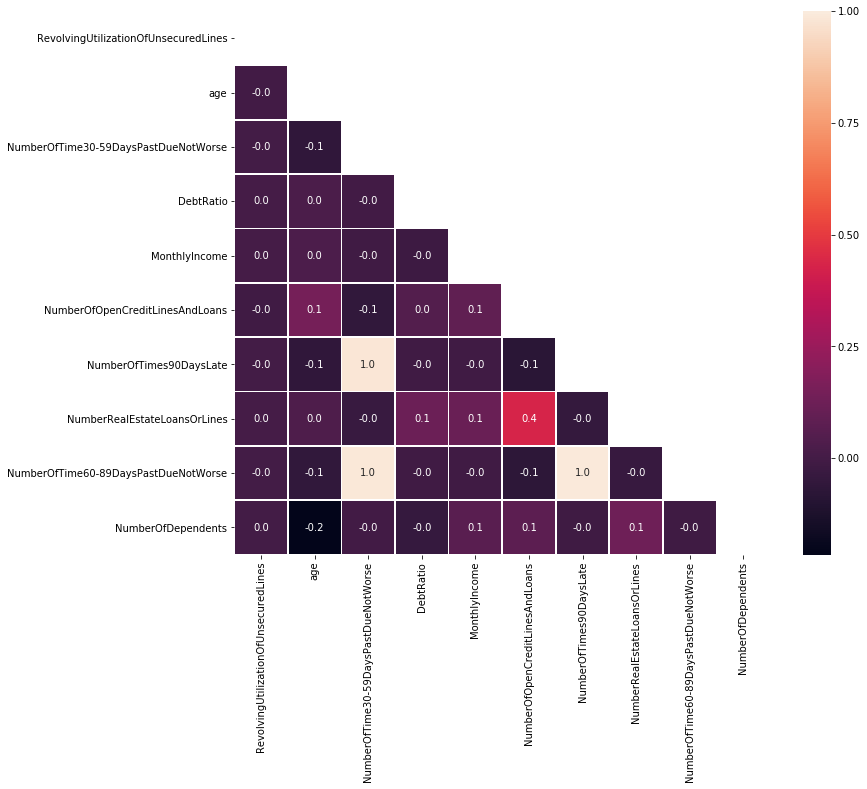

In [14]:
visualization()

On remarque que les features sont très décorrélées. Ceci implique qu'une PCA a peu de chance de donner des résultats de qualité équivalente pour un temps de training moins long. Pour s'en convaincre, traçons le diagramme d'éboulis :

In [24]:
def find_optimal_dimension(data, explained_proportion, show=False):
    '''
        Return how many dimensions to keep to explain a given proportion of the data.
        Informative purpose only since this feature is already implemented in sklearn.
        Use PCA(n_components=explained_proportion) instead.

        data : array of shape (n_samples, n_features)
        explained_proportion : float in [0, 1]
    '''
    p = data.shape[1]
    pca = PCA(data.shape[1])

    # Important : Normalize data to have homogenous features
    pipeline = Pipeline([('scaling', StandardScaler()), ('pca', pca)])
    data = pipeline.fit_transform(data)

    # Determine how many components to keep
    explained_ratio = np.cumsum(pca.explained_variance_ratio_)
    for k in range(len(explained_ratio)):
        if explained_ratio[k] >= explained_proportion:
            p=k+1
            break
    print('Keeping {} components to explain {}% of the variance'.format(p, 100*explained_proportion))

    if show:
        eigen_values = pca.explained_variance_
        plt.plot(range(len(eigen_values)), eigen_values)
        plt.axvline(p, c='orange')
        plt.xlabel('Eigenvalue index')
        plt.ylabel('Eigenvalue')
        plt.title('Keeping {} components to explain {}% of the variance'.format(p, 100*explained_proportion))
        plt.show()        

    return p

Keeping 9 components to explain 99.0% of the variance


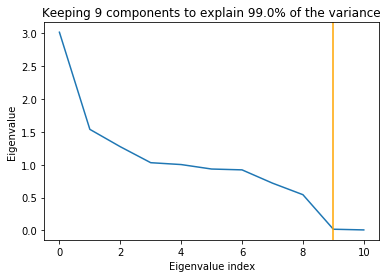

9

In [25]:
find_optimal_dimension(data, .99, show=True)

# Nettoyage des données

In [57]:
from collections import Counter

On reprend un jeu de données propre :

In [58]:
data = pd.read_csv('data/cs-training.csv').drop('Unnamed: 0', axis = 1)

### Age

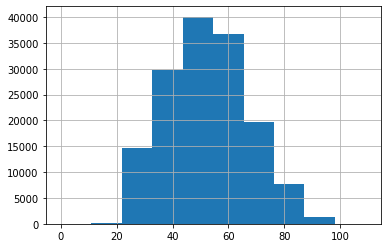

In [59]:
data.age.hist()

In [60]:
Counter(data[data.age<30].age)

Counter({27: 1338,
         25: 953,
         24: 816,
         28: 1560,
         26: 1193,
         29: 1702,
         23: 641,
         22: 434,
         21: 183,
         0: 1})

Une personne est agée de 0 an, c'est probablement une erreur. On le remplace par la médiane.

In [61]:
data.loc[data.age < 21, 'age'] = data.age.median()

In [62]:
Counter(data[data.age>100].age)

Counter({101.0: 3, 103.0: 3, 102.0: 3, 107.0: 1, 105.0: 1, 109.0: 2})

### NumberOfTime30-59DaysPastDueNotWorse

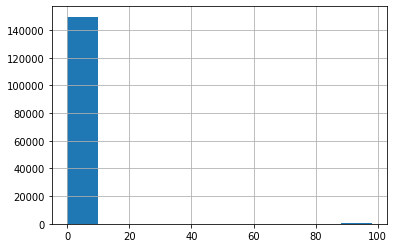

In [63]:
data["NumberOfTime30-59DaysPastDueNotWorse"].hist()

In [64]:
Counter(data["NumberOfTime30-59DaysPastDueNotWorse"])

Counter({2: 4598,
         0: 126018,
         1: 16033,
         3: 1754,
         4: 747,
         5: 342,
         7: 54,
         10: 4,
         6: 140,
         98: 264,
         12: 2,
         8: 25,
         9: 12,
         96: 5,
         13: 1,
         11: 1})

On suppose que les valeurs 98 et 96 sont des erreurs.

In [65]:
data.loc[
    data["NumberOfTime30-59DaysPastDueNotWorse"] > 20,
    'NumberOfTime30-59DaysPastDueNotWorse',
] = data["NumberOfTime30-59DaysPastDueNotWorse"].median()

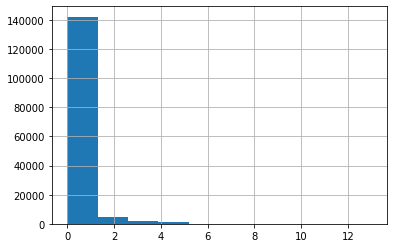

In [66]:
data["NumberOfTime30-59DaysPastDueNotWorse"].hist()

### NumberOfTimes90DaysLate

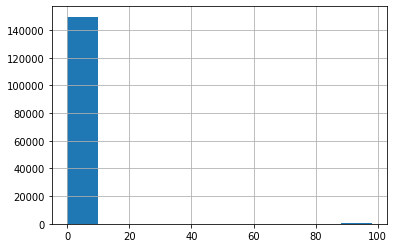

In [67]:
data.NumberOfTimes90DaysLate.hist()

In [68]:
Counter(data.NumberOfTimes90DaysLate)

Counter({0: 141662,
         1: 5243,
         3: 667,
         2: 1555,
         5: 131,
         4: 291,
         98: 264,
         10: 8,
         9: 19,
         6: 80,
         7: 38,
         8: 21,
         15: 2,
         96: 5,
         11: 5,
         13: 4,
         14: 2,
         17: 1,
         12: 2})

On suppose encore que les valeurs 96 et 98 sont des erreurs.

In [69]:
data.loc[
    data.NumberOfTimes90DaysLate > 20,
    'NumberOfTimes90DaysLate',
] = data.NumberOfTimes90DaysLate.median()

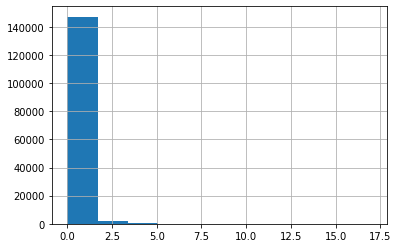

In [70]:
data.NumberOfTimes90DaysLate.hist()

### NumberRealEstateLoansOrLines¶

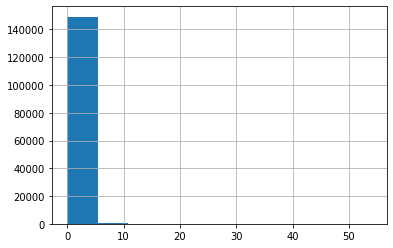

In [71]:
data.NumberRealEstateLoansOrLines.hist()

In [72]:
Counter(data.NumberRealEstateLoansOrLines)

Counter({6: 320,
         0: 56188,
         1: 52338,
         3: 6300,
         4: 2170,
         2: 31522,
         5: 689,
         8: 93,
         7: 171,
         9: 78,
         17: 4,
         15: 7,
         10: 37,
         12: 18,
         11: 23,
         16: 4,
         26: 1,
         14: 7,
         54: 1,
         21: 1,
         18: 2,
         13: 15,
         23: 2,
         29: 1,
         25: 3,
         19: 2,
         20: 2,
         32: 1})

Ici, les valeurs ne sont pas aussi dispersées que dans les cas précédents. Nous considérons qu'elles sont sans erreurs.

### NumberOfDependents

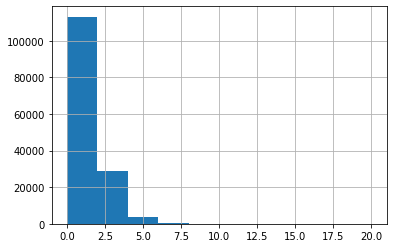

In [73]:
data.NumberOfDependents.hist()

In [74]:
# Counter(data.NumberOfDependents)

On retrouve beaucoup de valeurs NaN. On les remplace par la médiane.

In [75]:
data.loc[
    data.NumberOfDependents.isnull(),
    'NumberOfDependents',
] = data.NumberOfDependents.median()

In [76]:
data.NumberOfDependents[data.NumberOfDependents.isnull()]

Series([], Name: NumberOfDependents, dtype: float64)

In [77]:
Counter(data.NumberOfDependents)

Counter({2.0: 19522,
         1.0: 26316,
         0.0: 90826,
         3.0: 9483,
         4.0: 2862,
         5.0: 746,
         6.0: 158,
         8.0: 24,
         7.0: 51,
         20.0: 1,
         10.0: 5,
         9.0: 5,
         13.0: 1})

Les valeurs supérieures à 10 sont probablement des erreurs car très rares.

In [78]:
data.loc[
    data.NumberOfDependents > 10,
    'NumberOfDependents',
] = 10

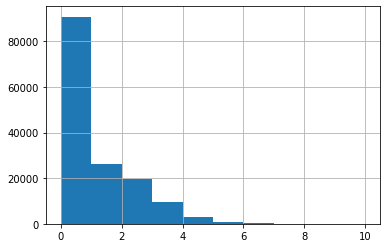

In [79]:
data.NumberOfDependents.hist()

### RevolvingUtilizationOfUnsecuredLines

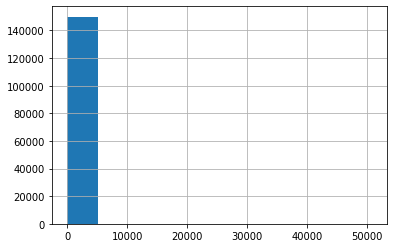

In [80]:
data.RevolvingUtilizationOfUnsecuredLines.hist()

In [81]:
data.loc[
    data.RevolvingUtilizationOfUnsecuredLines > 5,
    'RevolvingUtilizationOfUnsecuredLines',
] = data.RevolvingUtilizationOfUnsecuredLines.median()

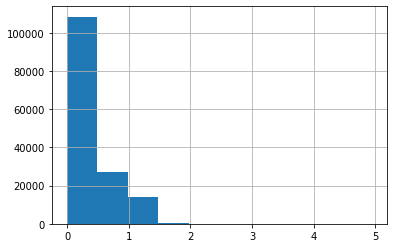

In [82]:
data.RevolvingUtilizationOfUnsecuredLines.hist()

### DebtRatio

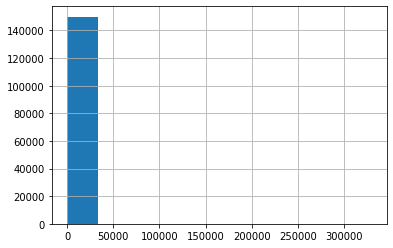

In [83]:
data.DebtRatio.hist()

In [84]:
# Counter(data.DebtRatio)

In [85]:
data.loc[
    data.DebtRatio > 1,
    'DebtRatio',
] = data.DebtRatio.median()

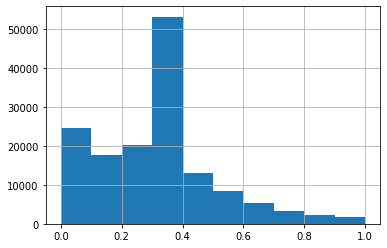

In [86]:
data.DebtRatio.hist()

In [87]:
data.DebtRatio.describe()

count    150000.000000
mean          0.317893
std           0.199835
min           0.000000
25%           0.175074
50%           0.366506
75%           0.380021
max           1.000000
Name: DebtRatio, dtype: float64

### MonthlyIncome

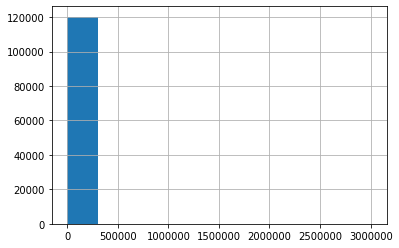

In [88]:
data.MonthlyIncome.hist()

In [89]:
data.MonthlyIncome.describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [90]:
data.loc[data.MonthlyIncome.isnull(), 'MonthlyIncome'] = data.MonthlyIncome.median()

In [91]:
data.MonthlyIncome.describe()

count    1.500000e+05
mean     6.418455e+03
std      1.289040e+04
min      0.000000e+00
25%      3.903000e+03
50%      5.400000e+03
75%      7.400000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

### NumberOfOpenCreditLinesAndLoans

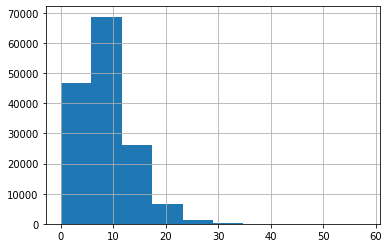

In [92]:
data.NumberOfOpenCreditLinesAndLoans.hist()

In [93]:
data.NumberOfOpenCreditLinesAndLoans.describe()

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

Il ne semble pas y avoir d'erreurs manifestes.

### NumberOfTime60-89DaysPastDueNotWorse

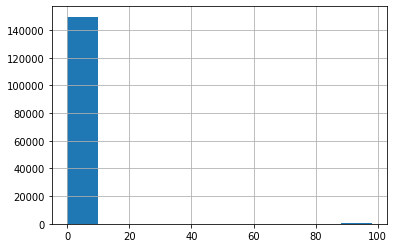

In [94]:
data["NumberOfTime60-89DaysPastDueNotWorse"].hist()

In [95]:
data["NumberOfTime60-89DaysPastDueNotWorse"].describe()

count    150000.000000
mean          0.240387
std           4.155179
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: float64

In [96]:
Counter(data["NumberOfTime60-89DaysPastDueNotWorse"])

Counter({0: 142396,
         1: 5731,
         2: 1118,
         5: 34,
         3: 318,
         98: 264,
         4: 105,
         6: 16,
         7: 9,
         8: 2,
         96: 5,
         11: 1,
         9: 1})

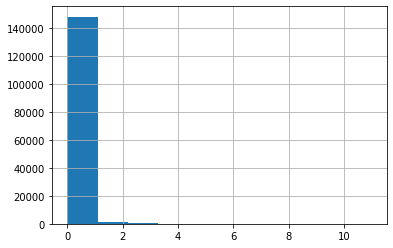

In [97]:
data.loc[
    data["NumberOfTime60-89DaysPastDueNotWorse"] > 20,
    "NumberOfTime60-89DaysPastDueNotWorse",
] = data["NumberOfTime60-89DaysPastDueNotWorse"].median()
data["NumberOfTime60-89DaysPastDueNotWorse"].hist()

## Vérifications

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124753f28>,
      dtype=object)

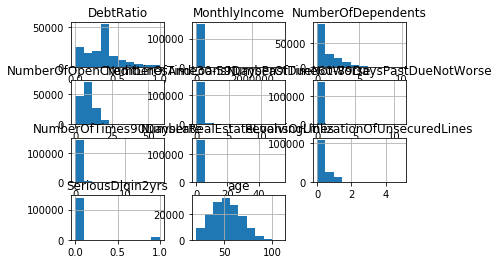

In [98]:
data.hist()

## Nouvel essai d'entrainement de modèles

In [46]:
X = data.drop('SeriousDlqin2yrs', axis=1)
y = data.SeriousDlqin2yrs

/Users/antoine/Documents/Ponts/2A/MALAP/RAPPEL/GiveMeSomeCredit/venv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


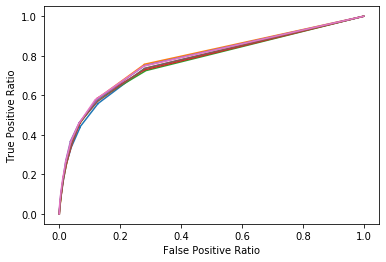

Mean: 0.778243


In [67]:
eval_model(RandomForestClassifier(), X, y)

/Users/antoine/Documents/Ponts/2A/MALAP/RAPPEL/GiveMeSomeCredit/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/antoine/Documents/Ponts/2A/MALAP/RAPPEL/GiveMeSomeCredit/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/antoine/Documents/Ponts/2A/MALAP/RAPPEL/GiveMeSomeCredit/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/antoine/Documents/Ponts/2A/MALAP/RAPPEL/GiveMeSomeCredit/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

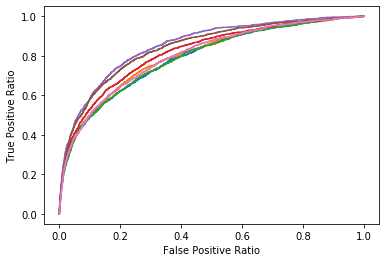

Mean: 0.812969


In [68]:
eval_model(LogisticRegression(), X, y)

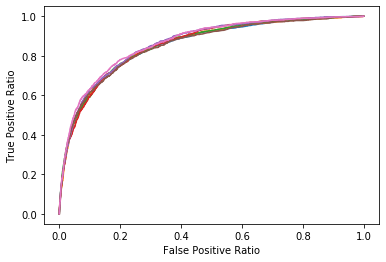

Mean: 0.858762


In [69]:
eval_model(AdaBoostClassifier(), X, y)

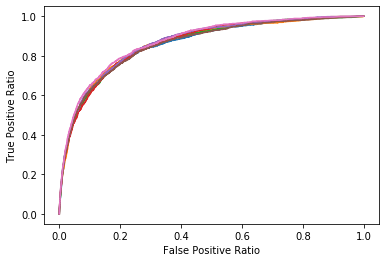

Mean: 0.863566


In [70]:
eval_model(GradientBoostingClassifier(), X, y)

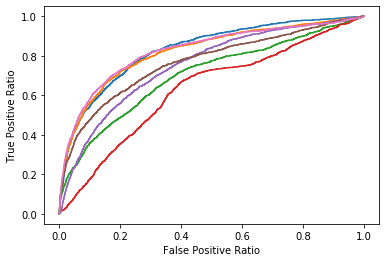

Mean: 0.760824


In [71]:
eval_model(MLPClassifier(), X, y)

On remarque une amélioration des modèles, en particulier sur la régression logistique où la différence de qualité de prédiction est tout à fait étonnante. Les résultats donnés par MLP sont mauvais, probablement parce que ce modèle demande un choix d'hyper-paramètres soignés.

## Optimisation du GradientBoostingClassifier

On utilise Grid Search pour déterminer les meilleurs hyper parametres. Nous allons essayer d'optimiser sur les paramètres suivants :
- n_estimators
- max_depth
- min_samples_split

### n_estimator

In [2]:
from sklearn.model_selection import GridSearchCV

In [73]:
parameters = {'n_estimators': range(50,301,50)}
# parameters = {'n_estimators': range(300,701,100)}
# parameters = {'n_estimators': range(250,350,25)}
# parameters = {'n_estimators': range(260,290,5)}

gs = GridSearchCV(GradientBoostingClassifier(), parameters, scoring='roc_auc')
gs.fit(X, y)
print(gs.best_params_, gs.best_score_)

/Users/antoine/Documents/Ponts/2A/MALAP/RAPPEL/GiveMeSomeCredit/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'n_estimators': 250} 0.8638021746998462


### max_depth

In [74]:
parameters = {'max_depth': range(2,5,1)}
gs = GridSearchCV(GradientBoostingClassifier(
    n_estimators=270,
), parameters, scoring='roc_auc')
gs.fit(X, y)
print(gs.best_params_, gs.best_score_)

/Users/antoine/Documents/Ponts/2A/MALAP/RAPPEL/GiveMeSomeCredit/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 3} 0.8637985363392743


### min_samples_split

In [75]:
parameters = {'min_samples_split': range(2,4,1)}
gs = GridSearchCV(GradientBoostingClassifier(
    n_estimators=270,
    max_depth=3,
), parameters, scoring='roc_auc')
gs.fit(X, y)
print(gs.best_params_, gs.best_score_)

/Users/antoine/Documents/Ponts/2A/MALAP/RAPPEL/GiveMeSomeCredit/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'min_samples_split': 3} 0.863882893075885


Remarque : Notre démarche est très discutable. Nous cherchons la meilleure valeur d'un hyper-paramètre en considérant que les autres sont constants. C'est chaques combinaisons des hyper-paramètres qu'il faudrait calculer, mais cela est extrêmement coûteux en temps de calcul.

### Evaluation

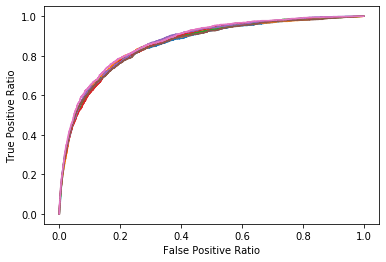

Mean: 0.864531


In [79]:
clf = GradientBoostingClassifier(
    n_estimators=270,
    max_depth=3,
    min_samples_split=3,
)
eval_model(clf, X, y)

## Utilisation d'un modèle pour nettoyer les données 

Pour le moment, le défaut majeur de notre travail repose sur notre choix de valeurs pour remplacer les données fausses/abérantes.

In [77]:
def plot_feature_importance(clf, X_train, y_train, feature_names=feature_names):
    '''
        Given a classifier clf and a fitting set (X, y), fit the clf 
        and plot the importance of each feature.
        
        clf: classifier with feature_importances_ attribute. 
    '''
    clf.fit(X, y)
    feature_importance = dict(zip(feature_names, clf.feature_importances_))
    sorted_feature_importance = np.array(sorted(feature_importance.items(), key=lambda x: x[1]))

    plt.barh(sorted_feature_importance[:, 0], sorted_feature_importance[:, 1].astype(float))
    plt.xlabel('Feature importance')
    plt.show()

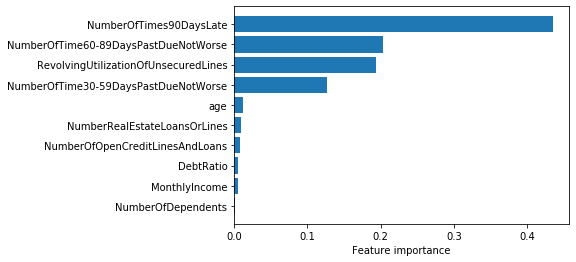

In [78]:
X_train, y_train, _, _ = train_test_split(X, y, test_size=0.9, random_state=random_state)
plot_feature_importance(clf, X_train, y_train)

Il est étonnant que la feature `MonthlyIncome` soit aussi peu déterminante dans la classification. En remplaçant toutes les données NaN par la médiane dans le dataset, il est possible que nous ayons rendu la feature non utilisable. Nous proposons donc de réaliser une prédiction de cette feature en utilisant les autres colonnes de X.

In [188]:
### loading dataset
data = pd.read_csv('data/cs-training.csv').drop('Unnamed: 0', axis = 1)
data.loc[data.NumberOfDependents.isnull(), 'NumberOfDependents'] = data.NumberOfDependents.median()

### cleaning
data.loc[data.age < 21, 'age'] = data.age.median()
data.loc[
    data["NumberOfTime30-59DaysPastDueNotWorse"] > 20,
    'NumberOfTime30-59DaysPastDueNotWorse',
] = data["NumberOfTime30-59DaysPastDueNotWorse"].median()

data.loc[
    data.NumberOfTimes90DaysLate > 20,
    'NumberOfTimes90DaysLate',
] = data.NumberOfTimes90DaysLate.median()

data.loc[
    data.NumberOfDependents.isnull(),
    'NumberOfDependents',
] = data.NumberOfDependents.median()

data.loc[
    data.NumberOfDependents > 10,
    'NumberOfDependents',
] = 10

data.loc[
    data.RevolvingUtilizationOfUnsecuredLines > 5,
    'RevolvingUtilizationOfUnsecuredLines',
] = data.RevolvingUtilizationOfUnsecuredLines.median()


data.loc[
    data.DebtRatio > 1,
    'DebtRatio',
] = data.DebtRatio.median()

data.loc[
    data["NumberOfTime60-89DaysPastDueNotWorse"] > 20,
    "NumberOfTime60-89DaysPastDueNotWorse",
] = data["NumberOfTime60-89DaysPastDueNotWorse"].median()

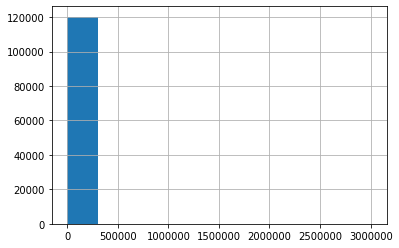

In [189]:
data.MonthlyIncome.hist()

In [190]:
data.MonthlyIncome.describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [191]:
number_of_lines_with_null_monthly_income = len(data[data.MonthlyIncome.isnull()==True])
number_of_lines = len(data)
'{} lines out of {} have null monthly income'.format(
    number_of_lines_with_null_monthly_income, number_of_lines
)

'29731 lines out of 150000 have null monthly income'

On supprime les lignes avec un monthly income nul.

In [192]:
data = data[data.MonthlyIncome.isnull()==False]
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000,1.202690e+05,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000
mean,0.069486,0.332884,51.290224,0.261239,0.309738,6.670221e+03,8.758475,0.091395,1.054519,0.067299,0.851724
std,0.254280,0.359637,14.425926,0.718683,0.216876,1.438467e+04,5.172835,0.488939,1.149273,0.336365,1.147135
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035084,40.000000,0.000000,0.143388,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.175972,51.000000,0.000000,0.296023,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.575464,61.000000,0.000000,0.427013,8.249000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,4.937063,103.000000,13.000000,1.000000,3.008750e+06,58.000000,17.000000,54.000000,11.000000,10.000000


In [193]:
X = data.drop(['SeriousDlqin2yrs', 'MonthlyIncome'], axis=1)
y = data.MonthlyIncome

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=random_state)

In [211]:
reg = RandomForestRegressor(n_estimators=150, min_samples_split=0.5) 
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.008396523519860088

In [215]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.03840841206324952

In [216]:
reg = linear_model.Lasso()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.03842119437746205

In [217]:
from sklearn.ensemble import AdaBoostRegressor
reg = AdaBoostRegressor()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

-1.083662389185431

In [218]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.22927054115166345

In [219]:
from sklearn.dummy import DummyRegressor
reg = DummyRegressor()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

-2.0170224640070344e-05

In [220]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.06586034869532853

In [221]:
from sklearn.ensemble import BaggingRegressor
reg = BaggingRegressor()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.17000681630643544

In [222]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

/Users/antoine/Documents/Ponts/2A/MALAP/RAPPEL/GiveMeSomeCredit/venv/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.02467346100371604

In [224]:
from sklearn.linear_model import ElasticNet
reg = ElasticNet()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.021745941346902775

In [225]:
from sklearn.linear_model import Ridge
reg = Ridge()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.03841335127473644

In [226]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.01497782243401147

In [227]:
from sklearn.svm import SVR
reg = SVR(kernel='linear')
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.015571102355532718

In [228]:
reg = SVR(kernel='rbf')
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

/Users/antoine/Documents/Ponts/2A/MALAP/RAPPEL/GiveMeSomeCredit/venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-0.006669834699982058